## Import Data<a name="import"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# set display columns to max so that we can view all columns
pd.set_option('display.max_columns', None)

In [2]:
# import the Vienna dataset
vienna_raw = pd.read_csv('listings_vienna.csv', index_col='id')

# saving raw data as new dataframe for exploration
vienna = vienna_raw.copy()

## Initial Data Exploration<a name="exploration"></a>

In [3]:
# view first few rows
vienna.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15883,https://www.airbnb.com/rooms/15883,2.020000e+13,4/15/2021,b&b near Old Danube river,"Four rooms, each one differently and individua...",small and personal<br /><br />Four rooms at th...,https://a0.muscache.com/pictures/18eff738-a737...,62142.0,https://www.airbnb.com/users/show/62142,Eva,12/11/2009,"Vienna, Wien, Austria",Mein größtes Hobby: Reisen! Am liebsten mit me...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/24166...,https://a0.muscache.com/im/pictures/user/24166...,Donaustadt,6.0,6.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Vienna, Austria",Donaustadt,NaN,48.24262,16.42767,Room in bed and breakfast,Hotel room,3.0,NaN,1 bath,1.0,2.0,"[""Hot water"", ""High chair"", ""Essentials"", ""Hai...",$87.00,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,30.0,60.0,90.0,365.0,4/15/2021,11.0,0.0,0.0,4/10/2015,2/19/2020,95.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,t,4.0,2.0,0.0,0.0,0.15
38768,https://www.airbnb.com/rooms/38768,2.020000e+13,4/15/2021,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,the Karmeliterviertel became very popular in t...,https://a0.muscache.com/pictures/ad4089a3-5355...,166283.0,https://www.airbnb.com/users/show/166283,Hannes,7/14/2010,"Vienna, Wien, Austria",I am open minded and like travelling myself. I...,within an hour,100%,98%,t,https://a0.muscache.com/im/users/166283/profil...,https://a0.muscache.com/im/users/166283/profil...,Leopoldstadt,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Vienna, Austria",Leopoldstadt,NaN,48.21924,16.37831,Entire apartment,Entire home/apt,5.0,NaN,1 bath,1.0,3.0,"[""Cooking basics"", ""Shampoo"", ""Kitchen"", ""Host...",$60.00,3.0,100.0,3.0,3.0,100.0,100.0,3.0,100.0,NaN,t,0.0,0.0,18.0,109.0,4/15/2021,324.0,11.0,0.0,3/23/2011,10/10/2020,95.0,10.0,9.0,10.0,10.0,10.0,10.0,NaN,f,3.0,3.0,0.0,0.0,2.64
40625,https://www.airbnb.com/rooms/40625,2.020000e+13,4/15/2021,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,The neighbourhood offers plenty of restaurants...,https://a0.muscache.com/pictures/11509144/d55c...,175131.0,https://www.airbnb.com/users/show/175131,Ingela,7/20/2010,"Vienna, Wien, Austria",I´m originally from Sweden but have been livin...,within a few hours,90%,74%,t,https://a0.muscache.com/im/users/175131/profil...,https://a0.muscache.com/im/users/175131/profil...,Rudolfsheim-Fünfhaus,16.0,16.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Vienna, Austria",Rudolfsheim-Fnfhaus,NaN,48.18434,16.32701,Entire apartment,Entire home/apt,6.0,NaN,1 bath,2.0,4.0,"[""Cooking basics

In [4]:
# view number of rows/columns
vienna.shape

(11502, 73)

In [5]:
vienna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11502 entries, 15883 to 49171797
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   11487 non-null  object 
 1   scrape_id                                     11487 non-null  float64
 2   last_scraped                                  11487 non-null  object 
 3   name                                          11473 non-null  object 
 4   description                                   11050 non-null  object 
 5   neighborhood_overview                         6589 non-null   object 
 6   picture_url                                   11487 non-null  object 
 7   host_id                                       11487 non-null  float64
 8   host_url                                      11487 non-null  object 
 9   host_name                                     11219 no

There are three different datatypes represented in the data. Notice that the `price` column, which will be our label (ie what we are trying to predict), is represented as a string instead of a number.  We will need to change this before running any type of machine learning algorithm.  Also, there are several features that have missing values. We'll take care of these as we go along.

We will analyze more of the features later, but let's first look at a few of the features in further detail: `neighborhoods in Vienna`, `property types`, `room types`, and `amenities`.

In [6]:
# view value counts for neighborhood_cleansed
vienna['neighbourhood_cleansed'].value_counts()

Leopoldstadt            1221
Landstra§e               997
Rudolfsheim-Fnfhaus     825
Alsergrund               730
Neubau                   711
Margareten               696
Innere Stadt             662
Favoriten                645
Ottakring                564
Mariahilf                553
Wieden                   502
Meidling                 449
Brigittenau              443
Josefstadt               426
Hernals                  341
Whring                  337
Donaustadt               335
Penzing                  296
Dbling                  269
Hietzing                 158
Floridsdorf              141
Simmering                121
Liesing                   70
Name: neighbourhood_cleansed, dtype: int64

In [7]:
# view value counts for property_type
vienna['property_type'].value_counts()

Entire apartment                      7524
Private room in apartment             2415
Entire serviced apartment              287
Entire condominium                     281
Entire loft                            163
Entire house                           111
Private room in house                   96
Room in boutique hotel                  89
Private room in condominium             74
Shared room in apartment                65
Private room in bed and breakfast       50
Room in serviced apartment              46
Private room in hostel                  35
Room in hotel                           30
Private room in loft                    26
Room in aparthotel                      25
Entire guest suite                      23
Private room in townhouse               16
Private room in guesthouse              15
Entire townhouse                        14
Entire villa                            12
Shared room in hostel                   10
Entire bungalow                          8
Entire plac

There are a lot of different values for this feature. We could combine some of these (example: cabin and chalet should be similar to a house) to make our list more manageable. But first, let's also look at `room_type`.

In [8]:
# view value counts for room_type
vienna['room_type'].value_counts()

Entire home/apt    8466
Private room       2853
Shared room          88
Hotel room           85
Name: room_type, dtype: int64

This seems to be similar data as the `property_type`. I'll leave both in for now and you would want to check for multi-linear correlation on your own if you were actually working on this as a project.

In [9]:
# view value counts for amenities
vienna['amenities']

id
15883       ["Hot water", "High chair", "Essentials", "Hai...
38768       ["Cooking basics", "Shampoo", "Kitchen", "Host...
40625       ["Cooking basics", "Children\u2019s books and ...
51287       ["Cooking basics", "Shampoo", "Kitchen", "Host...
70637       ["Cooking basics", "Indoor fireplace", "Shampo...
                                  ...                        
49169158    ["Shampoo", "Kitchen", "Smoke alarm", "Paid pa...
49169449    ["Cooking basics", "Essentials", "Hair dryer",...
49169526    ["Shampoo", "Dedicated workspace", "Lock on be...
49170145    ["Kitchen", "Dedicated workspace", "Record pla...
49171797    ["Indoor fireplace", "Shampoo", "Kitchen", "Lo...
Name: amenities, Length: 11502, dtype: object

The `amenities` feature is a list of available amenities for each property. This will be difficult to work with but some of these listed amenities might have an influence on the price. We will work on separating these list items out later.

After a manual review of each feature, there are several features that we can immediately remove from the dataset. First, we can drop features that are not related to price.

In [10]:
drop_features = ['listing_url','scrape_id','host_url','host_name','host_location',
                'host_neighbourhood','neighbourhood_group_cleansed','calendar_updated','license',
                'host_thumbnail_url','host_picture_url','host_verifications','host_has_profile_pic',
                'has_availability','host_total_listings_count','neighbourhood',
                'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
                'minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30','availability_60',
                'availability_365','calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d',
                'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms','last_scraped','neighborhood_overview',
                 'host_about','picture_url','host_identity_verified', 'minimum_nights', 'maximum_nights', 
                 'availability_90', 'instant_bookable','bathrooms','host_total_listings_count']

vienna = vienna.drop(drop_features, axis=1)
vienna.head()

,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15883,b&b near Old Danube river,"Four rooms, each one differently and individua...",62142.0,12/11/2009,NaN,NaN,100%,f,6.0,Donaustadt,48.24262,16.42767,Room in bed and breakfast,Hotel room,3.0,1 bath,1.0,2.0,"[""Hot water"", ""High chair"", ""Essentials"", ""Hai...",$87.00,11.0,4/10/2015,2/19/2020,95.0,10.0,10.0,10.0,10.0,9.0,9.0,4.0,0.15
38768,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,166283.0,7/14/2010,within an hour,100%,98%,t,3.0,Leopoldstadt,48.21924,16.37831,Entire apartment,Entire home/apt,5.0,1 bath,1.0,3.0,"[""Cooking basics"", ""Shampoo"", ""Kitchen"", ""Host...",$60.00,324.0,3/23/2011,10/10/2020,95.0,10.0,9.0,10.0,10.0,10.0,10.0,3.0,2.64
40625,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,175131.0,7/20/2010,within a few hours,90%,74%,t,16.0,Rudolfsheim-Fnfhaus,48.18434,16.32701,Entire apartment,Entire home/apt,6.0,1 bath,2.0,4.0,"[""Cooking basics"", ""Children\u2019s books and ...",$88.00,156.0,8/4/2010,2/15/2021,97.0,10.0,10.0,10.0,10.0,9.0,9.0,15.0,1.20
51287,little studio- next to citycenter- wifi- nice ...,small studio in new renovated old house and ve...,166283.0,7/14/2010,within an hour,100%,98%,t,3.0,Leopoldstadt,48.21778,16.37847,Entire apartment,Entire home/apt,3.0,1 bath,NaN,2.0,"[""Cooking basics"", ""Shampoo"", ""Kitchen"", ""Host...",$60.00,310.0,1/27/2011,1/4/2021,92.0,10.0,9.0,10.0,10.0,10.0,9.0,3.0,2.49
70637,Flat in the Center with Terrace,<b>The space</b><br />My apartment (including ...,358842.0,1/23/2011,within a few hours,100%,71%,t,3.0,Leopoldstadt,48.21760,16.38018,Private room in apartment,Private room,2.0,2 shared baths,1.0,2.0,"[""Cooking basics"", ""Indoor fireplace"", ""Shampo...",$50.00,116.0,3/28/2011,12/23/2019,95.0,10.0,9.0,10.0,9.0,10.0,10.0,3.0,0.95


In [11]:
vienna.shape

(11502, 32)

**Important:** In a real world project, we would stop here and split the data into what is called a training set and a test set. The training set is used to explore and train the data, and the test set is used at the very end to determine how new data generalizes with your model. This will be covered in much more detail in the machine learning classes.

## Missing Data<a name="missing"></a>
Missing data is very common in real world datasets and Pandas is a powerful tool in working with this missing data.

### Filtering Missing Data<a name="filter"></a>

Let's now look at some of the missing data in the dataset. First, we need to understand what data is missing (we should attempt to either find the missing data or impute it based on other data) and what data just doesn't exist (where that fact that it is missing might provide additional information -- example: no reviews for a property).

In [12]:
# creates True/False mask
vienna['beds'].isnull()

id
15883       False
38768       False
40625       False
51287       False
70637       False
            ...  
49169158    False
49169449    False
49169526    False
49170145    False
49171797    False
Name: beds, Length: 11502, dtype: bool

In [13]:
vienna['beds'].isnull().sum() # missing from data

117

This could be an example of purely missing data. Every property probably should have at least one bed listed, even if it is a non-standard bed type.

In [14]:
vienna['first_review'].isnull().sum() # doesn't exist

2352

This is an example of data that probably just doesn't exist. These properties might not have any reviews from guests. And the fact that they don't have any reviews might be important to the properties price.

### Dropping missing values<a name="drop"></a>
One way to handle missing data is to drop the values completely. This could be appropriate based on your data but remember that you might lose some other information by dropping the data.

In [15]:
#setup simple DataFrame
data = pd.DataFrame([[2.,4.,6.],[1.,np.nan,np.nan],
                     [np.nan,np.nan,np.nan],[np.nan,10.,12.]])
data

,0,1,2
0,2.0,4.0,6.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,10.0,12.0


In [16]:
# using drop_na to drop rows with missing values
data.dropna()

,0,1,2
0,2.0,4.0,6.0


In [17]:
# dropping rows where there are missing values only for column '1'
data.dropna(subset=[1])

,0,1,2
0,2.0,4.0,6.0
3,NaN,10.0,12.0


In [18]:
# using drop_na to drop columns with missing values
data.dropna(axis=1)

""
0
1
2
3


In [19]:
# using drop_na to drop rows that have all missing values
data.dropna(how='all')

,0,1,2
0,2.0,4.0,6.0
1,1.0,NaN,NaN
3,NaN,10.0,12.0


In [20]:
# using drop_na to drop rows that don't have at least 2 values
data.dropna(thresh=2)

,0,1,2
0,2.0,4.0,6.0
3,NaN,10.0,12.0


#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

In [21]:
# run the following code
vienna.shape

(11502, 32)

**Exercise:** Create a new DataFrame called `vienna_dropped_rows` to drop all rows from the original `vienna` dataset with missing values. 

In [22]:
vienna_dropped_rows=vienna.dropna()
vienna_dropped_rows.shape

(3724, 32)

**Exercise:** Create a new DataFrame called `vienna_dropped_rows_subset` where rows with missing values in the `bedrooms` column are dropped.

In [23]:
vienna_dropped_rows_subset=vienna.dropna(subset=['bedrooms'])
vienna_dropped_rows_subset.shape

(10171, 32)

**Exercise:** Create a new DataFrame called `vienna_dropped_cols` where columns with missing values are dropped.

In [24]:
vienna_dropped_cols=vienna.dropna(axis=1)
vienna_dropped_cols.shape

(11502, 0)

**Exercise:** Drop rows from the `vienna` dataset that have only missing values. 

In [25]:
vienna=vienna.dropna(how='all')
vienna.shape

(11492, 32)

**Exercise:** Drop rows from the `vienna` dataset that don't have at least 10 values.

In [26]:
vienna=vienna.dropna(thresh=10)
vienna.shape

(11487, 32)

### Filling Missing Data<a name="filling"></a>

Instead of simply discarding data and potentially losing information from other data that goes along with it, sometimes it's better to fill the missing data. This can be done in a number of different ways.

In [27]:
# setup example DataFrame
data = pd.DataFrame(np.random.randn(7, 3))
data.iloc[:4, 1] = np.nan
data.iloc[:2, 2] = np.nan
data

,0,1,2
0,-0.661541,NaN,NaN
1,0.841987,NaN,NaN
2,-0.091236,NaN,-0.459244
3,-0.577509,NaN,0.668826
4,0.292588,0.633901,-0.377480
5,0.034080,0.950208,-1.327813
6,0.720499,-1.190234,-0.916642


In [28]:
# using fillna with a constant 
data.fillna(0)

,0,1,2
0,-0.661541,0.000000,0.000000
1,0.841987,0.000000,0.000000
2,-0.091236,0.000000,-0.459244
3,-0.577509,0.000000,0.668826
4,0.292588,0.633901,-0.377480
5,0.034080,0.950208,-1.327813
6,0.720499,-1.190234,-0.916642


In [29]:
# using fillna with a dictionary for potential different values
data.fillna({1: 1.5, 2:-1.5})

,0,1,2
0,-0.661541,1.500000,-1.500000
1,0.841987,1.500000,-1.500000
2,-0.091236,1.500000,-0.459244
3,-0.577509,1.500000,0.668826
4,0.292588,0.633901,-0.377480
5,0.034080,0.950208,-1.327813
6,0.720499,-1.190234,-0.916642


In [30]:
# same interpolation methods available for reindexing can be used with fillna
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df

,0,1,2
0,-0.870955,0.192096,-0.738813
1,-0.091992,-1.893025,-0.068601
2,0.513607,NaN,-1.123482
3,-1.179772,NaN,1.477482
4,1.141125,NaN,NaN
5,-0.146748,NaN,NaN


In [31]:
# using 'ffill'
df.fillna(method='ffill')

,0,1,2
0,-0.870955,0.192096,-0.738813
1,-0.091992,-1.893025,-0.068601
2,0.513607,-1.893025,-1.123482
3,-1.179772,-1.893025,1.477482
4,1.141125,-1.893025,1.477482
5,-0.146748,-1.893025,1.477482


In [32]:
# using 'ffill' with limit
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.870955,0.192096,-0.738813
1,-0.091992,-1.893025,-0.068601
2,0.513607,-1.893025,-1.123482
3,-1.179772,-1.893025,1.477482
4,1.141125,NaN,1.477482
5,-0.146748,NaN,1.477482


In [33]:
# using the mean of each column
df.fillna(df.mean())

,0,1,2
0,-0.870955,0.192096,-0.738813
1,-0.091992,-1.893025,-0.068601
2,0.513607,-0.850464,-1.123482
3,-1.179772,-0.850464,1.477482
4,1.141125,-0.850464,-0.113353
5,-0.146748,-0.850464,-0.113353


#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

In [34]:
# look at missing data for bathrooms
vienna['bathrooms_text'].isnull().sum()

12

**Exercise:** Fill missing values from `bathrooms_text` with the number `1`.

In [35]:
vienna['bathrooms_text'].fillna(1,inplace=True)
vienna['bathrooms_text'].value_counts()

1 bath               6814
1.5 baths            1860
1 shared bath        1342
1.5 shared baths      380
2 baths               320
1 private bath        264
2.5 baths             125
2 shared baths         95
Half-bath              51
2.5 shared baths       38
3 baths                38
3 shared baths         29
3.5 baths              17
Shared half-bath       17
4 shared baths         16
0 baths                15
4 baths                15
1                      12
3.5 shared baths        9
4.5 baths               8
Private half-bath       4
6 baths                 4
5 baths                 4
8 baths                 4
0 shared baths          3
9 baths                 1
11 baths                1
12 baths                1
Name: bathrooms_text, dtype: int64

**Exercise:** Fill missing values as follows:
- bedrooms: 1
- host_listings_count: 1
- host_is_superhost: 'f'

In [36]:
vienna[vienna['bedrooms'].isnull() | vienna[vienna['host_listings_count'].isnull() | vienna[vienna['host_is_superhost'].isnull()][['bedrooms','host_listings_count', 'host_is_superhost']]

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_13112/664979382.py, line 1)

In [42]:
vienna.fillna({'bedrooms':1, 'host_listings_count':1, 'host_is_superhost':'f'}, inplace=True)

**Exercise:** Fill the missing values in the `beds` column with the median.

In [43]:
vienna['beds'].median()

2.0

In [44]:
vienna['beds'].fillna(vienna['beds'].median(),inplace=True)
vienna['beds'].isnull().sum()

0

**Note:** There are more efficient ways to handle missing values by using pipelines with Scikit-learn, which you will study more in the machine learning classes. These pipelines will allow you to clean future data more easily so that you won't have to do it manually each time.

## Data Transformation<a name="transformation"></a>
### Removing Duplicates<a name="remove_dupes"></a>
You may also find yourself spending a lot of time identifying and handling duplicate data. Sometimes it will be easy to identify the duplicates (all or most of the values are the same), while other times duplicates will be much harder to identify.

In [45]:
# create basic DataFrame
data = pd.DataFrame({'Student': ['Stephanie','Nadia','Lukas','Sally','Nadia','Nadia'],
                    'Grade': [100,95,100,80,100,100]})
data

,Student,Grade
0,Stephanie,100
1,Nadia,95
2,Lukas,100
3,Sally,80
4,Nadia,100
5,Nadia,100


In [46]:
# returns boolean Series: True represents whether row has been observed before
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [47]:
# returns only non-duplicated rows
data.drop_duplicates()

,Student,Grade
0,Stephanie,100
1,Nadia,95
2,Lukas,100
3,Sally,80
4,Nadia,100


In [48]:
# keep the last row instead of the first
data.drop_duplicates(keep='last')

,Student,Grade
0,Stephanie,100
1,Nadia,95
2,Lukas,100
3,Sally,80
5,Nadia,100


In [49]:
# default considers all values
# can specify subset 
data.drop_duplicates(['Student'])

,Student,Grade
0,Stephanie,100
1,Nadia,95
2,Lukas,100
3,Sally,80


#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

**Exercise:** How many exact duplicates are in the `vienna` data? Drop any exact duplicates from the data.

In [50]:
vienna.duplicated().sum()

10

In [51]:
vienna.drop_duplicates(inplace=True)
vienna.duplicated().sum()

0

**Exercise:** How many properties have the exact same `host_id`, `name`, and `description`and are in the same neighborhood as a previous property?

In [52]:
vienna.duplicated(['host_id','name','description','neighbourhood_cleansed']).sum()

96

**Exercise**: These properties may be duplicates. Let's say after researching further that we have decided to remove these duplicated rows. Remove these rows from the `vienna` data.

In [53]:
vienna.drop_duplicates(['host_id','name','description','neighbourhood_cleansed'],inplace=True)

### Transforming Data Using a Function or Mapping<a name="map"></a>
Performing transformations based on values in an array.

In [54]:

# create a sample DataFrame
data = pd.DataFrame({
    'city': ['atlanta','Baltimore','boston','Buffalo','charlotte'],
    'state': ['GA','Maryland','Massachusetts','New York','NC']
})

data

,city,state
0,atlanta,GA
1,Baltimore,Maryland
2,boston,Massachusetts
3,Buffalo,New York
4,charlotte,NC


First, notice that some of these cities are capitlized and some are not. We need to keep that in mind when we go to map the values.

Suppose you wanted to add a column indicating the NFL mascot for the respective city. We can map the city to the mascot name as follows:

In [55]:
# create a dictionary mapping
city_to_mascot = {
    'atlanta':'Falcons',
    'baltimore':'Ravens',
    'boston':'Patriots',
    'buffalo':'Bills',
    'charlotte':'Panthers'
}

In [56]:
# use `str.lower()` to convert values before mapping
lowercased_city = data['city'].str.lower()
lowercased_city

0      atlanta
1    baltimore
2       boston
3      buffalo
4    charlotte
Name: city, dtype: object

In [57]:
# `map()` accepts a function or dictionary-like object
data['mascot'] = lowercased_city.map(city_to_mascot)
data

,city,state,mascot
0,atlanta,GA,Falcons
1,Baltimore,Maryland,Ravens
2,boston,Massachusetts,Patriots
3,Buffalo,New York,Bills
4,charlotte,NC,Panthers


In [58]:
# also can pass a function
data['city'].map(lambda x: city_to_mascot[x.lower()])

0     Falcons
1      Ravens
2    Patriots
3       Bills
4    Panthers
Name: city, dtype: object

Sometimes you might only want to map some values and leave others as they appear in the data. You can combine `map()` and `fillna()` for this purpose.

How could we use a mapping to abbreviate the states that don't yet have abbreviations?

In [59]:
state_abbr = {
    'Maryland':'MD',
    'Massachusetts':'MA',
    'New York':'NY'
}

# make a copy of data to use with the following example
data2 = data.copy()

# this won't work
data2['state']= data2['state'].map(state_abbr)
data2

,city,state,mascot
0,atlanta,NaN,Falcons
1,Baltimore,MD,Ravens
2,boston,MA,Patriots
3,Buffalo,NY,Bills
4,charlotte,NaN,Panthers


In [60]:
data['state'] = data['state'].map(state_abbr).fillna(data['state'])
data

,city,state,mascot
0,atlanta,GA,Falcons
1,Baltimore,MD,Ravens
2,boston,MA,Patriots
3,Buffalo,NY,Bills
4,charlotte,NC,Panthers


#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

**Exercise:** Change the column name from the British spelling of `neighbourhood_cleansed` to the American spelling of `neighborhood_cleansed`.

In [61]:
vienna.rename({'neighbourhood_cleansed':'neighborhood_cleansed'},axis=1,inplace=True)

**Exercise:** Check the value counts of this column. Notice that the various foreign language characters did not get encoded correctly.

In [62]:
vienna['neighborhood_cleansed'].value_counts()

Leopoldstadt            1220
Landstra§e               986
Rudolfsheim-Fnfhaus     822
Alsergrund               726
Neubau                   708
Margareten               688
Innere Stadt             654
Favoriten                631
Ottakring                547
Mariahilf                545
Wieden                   497
Brigittenau              439
Meidling                 430
Josefstadt               426
Hernals                  341
Donaustadt               334
Whring                  333
Penzing                  295
Dbling                  269
Hietzing                 158
Floridsdorf              141
Simmering                121
Liesing                   70
Name: neighborhood_cleansed, dtype: int64

**Exercise:** Use a mapping to update the following neighborhood names. Check your value counts again to ensure that the names were updated. 
- Landstrasse
- Rudolfsheim-Funfhaus
- Wahring
- Dobling

In [63]:
neighborhood_dict={'Landstra§e':'Landstrasse','Rudolfsheim-Fnfhaus':'Rudolfsheim-Funfhaus','Whring':'Wahring','Dbling':'Dobling',}
vienna['neighborhood_cleansed']=vienna['neighborhood_cleansed'].map(neighborhood_dict).fillna(vienna['neighborhood_cleansed'])

In [64]:
vienna['neighborhood_cleansed'].value_counts()

Leopoldstadt            1220
Landstrasse              986
Rudolfsheim-Funfhaus     822
Alsergrund               726
Neubau                   708
Margareten               688
Innere Stadt             654
Favoriten                631
Ottakring                547
Mariahilf                545
Wieden                   497
Brigittenau              439
Meidling                 430
Josefstadt               426
Hernals                  341
Donaustadt               334
Wahring                  333
Penzing                  295
Dobling                  269
Hietzing                 158
Floridsdorf              141
Simmering                121
Liesing                   70
Name: neighborhood_cleansed, dtype: int64

**Exercise:** Using Seaborn, plot a scatterplot using the `longitude` and `latitude` of the `vienna` DataFrame using the `neighborhood_cleansed` column as the hue.

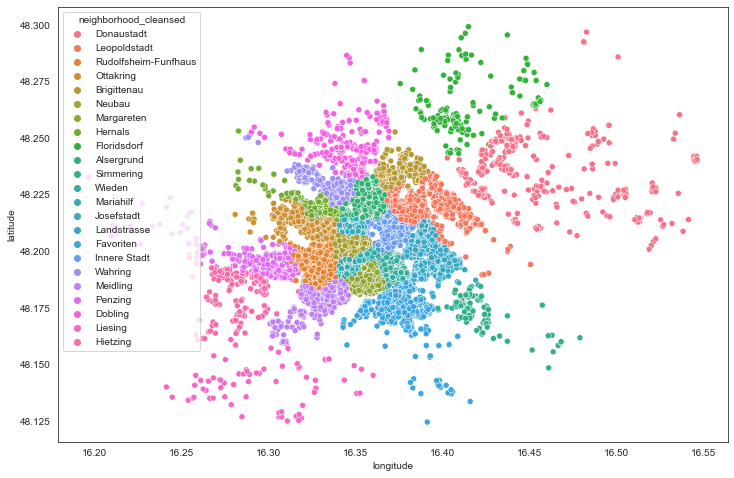

In [65]:
sns.set_style('white')
plt.figure(figsize=(12,8))
g=sns.scatterplot(x='longitude',y='latitude',data=vienna,hue='neighborhood_cleansed')
plt.show()

### Replacing Values<a name="replace"></a>
As we saw previously, `map` can be used to modify a subset of values but `replace` can sometimes be simpler and more flexible. However, using `map` is sometimes more efficient for larger datasets.

In [66]:
data

,city,state,mascot
0,atlanta,GA,Falcons
1,Baltimore,MD,Ravens
2,boston,MA,Patriots
3,Buffalo,NY,Bills
4,charlotte,NC,Panthers


In [67]:
# using replace to replace a single value
data.replace('Panthers', np.nan, inplace=True)
data

,city,state,mascot
0,atlanta,GA,Falcons
1,Baltimore,MD,Ravens
2,boston,MA,Patriots
3,Buffalo,NY,Bills
4,charlotte,NC,NaN


In [68]:
# using replace to replace multiple values
data.replace(['Falcons', 'Ravens'], np.nan, inplace=True)
data

,city,state,mascot
0,atlanta,GA,NaN
1,Baltimore,MD,NaN
2,boston,MA,Patriots
3,Buffalo,NY,Bills
4,charlotte,NC,NaN


In [69]:
# using replace to replace different values using lists
data.replace(['Patriots','Bills'],[np.nan, 'Wings'])

,city,state,mascot
0,atlanta,GA,NaN
1,Baltimore,MD,NaN
2,boston,MA,NaN
3,Buffalo,NY,Wings
4,charlotte,NC,NaN


In [70]:
# using replace to replace different values using a dictionary
data.replace({'Patriots':np.nan, 'Bills':'Wings'}, inplace=True)
data

,city,state,mascot
0,atlanta,GA,NaN
1,Baltimore,MD,NaN
2,boston,MA,NaN
3,Buffalo,NY,Wings
4,charlotte,NC,NaN


#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

**Exercise:** Check the value counts for the property types.

In [71]:
vienna['property_type'].value_counts()

Entire apartment                      7465
Private room in apartment             2405
Entire serviced apartment              287
Entire condominium                     281
Entire loft                            163
Entire house                           111
Private room in house                   96
Room in boutique hotel                  85
Private room in condominium             74
Shared room in apartment                64
Private room in bed and breakfast       42
Room in serviced apartment              38
Room in hotel                           30
Private room in loft                    26
Room in aparthotel                      23
Entire guest suite                      23
Private room in townhouse               16
Private room in hostel                  16
Private room in guesthouse              15
Entire townhouse                        14
Entire villa                            12
Shared room in hostel                   10
Entire bungalow                          8
Entire plac

**Exercise:** We want to combine some of these categories so that we eventually only have four categories: 'Apartment', 'House', 'Room', and 'Other'. For example, 'Entire house' and 'Entire cottage' can probably just be listed as 'House' to simplify the data.

First, combine the property types that you think could be simply represented by 'House' and 'Apartment' (Note: answers will vary based on how you break down the categories)

In [72]:
vienna['property_type'].replace({
    'Entire apartment':'Apartment',
    'Entire serviced apartment':'Apartment',
    'Entire condominium':'Apartment',
    'Entire loft':'Apartment',
    'Loft':'Apartment',
    'Entire house':'House',
    'Entire townhouse':'House',
    'Entire villa':'House',
    'Entire bungalow':'House',
    'Entire guesthouse':'House',
    'Entire cottage':'House',
    'Tiny house':'House',
    'Entire cabin':'House',
    'Entire chalet':'House',
    },inplace=True)

**Exercise:** Perform a similar task of combining property types that might be simply considered as a 'Room'. 

*Bonus:* You could perform this with `replace()` but it would take a long dictionary of values. Can you perform this using the Pandas [str.contains()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html) method in one line of code?

In [73]:
vienna.loc[vienna['property_type'].str.contains('room',case=False),'property_type']='Room'

**Exercise:** Change all other values not listed as 'House', 'Apartment', or 'Room' to 'Other'. 

*Bonus:* Again, you could perform this with `replace()`, but can you think of a way to do it in one line of code? Hint: You want to select everything where the property type is not 'House', 'Apartment', or 'Room' and code those as 'Other'.   

In [74]:
vienna.loc[~vienna.property_type.isin(['House','Apartment','Room']),'property_type']='Other'

**Exercise:** Check the property type value counts one last time to verify that you now only have four categories.

In [75]:
vienna['property_type'].value_counts()

Apartment    8196
Room         2986
House         158
Other          41
Name: property_type, dtype: int64

### Binning<a name="bin"></a>

Continuous data is often separated into 'bins' for analysis.

In [76]:
# setup list of birth years
year = [1955, 1964, 1975, 1985, 1960, 2001, 1978]

# setup bins 
bins = [1945, 1964, 1980, 1996, 2012]

# use the `cut()` function to divide years into their appropriate bins
cats = pd.cut(year, bins)

# returns a special `Categorical` object
cats

[(1945, 1964], (1945, 1964], (1964, 1980], (1980, 1996], (1945, 1964], (1996, 2012], (1964, 1980]]
Categories (4, interval[int64, right]): [(1945, 1964] < (1964, 1980] < (1980, 1996] < (1996, 2012]]

Uses mathematical notation for intervals.
- `(` is *open* (not included in the category)
- `]` is *closed* (inclusive)
- can change which side is closed by passing `right=False`

In [77]:
# can pass your own bin names
cats = pd.cut(year, bins, labels=['Baby Boomer', 'Generation X', 
                                  'Generation Y (Millennials)', 'Generation Z'])

In [78]:
# label for the year data
cats.codes

array([0, 0, 1, 2, 0, 3, 1], dtype=int8)

In [79]:
# categories for the year data
cats.categories

Index(['Baby Boomer', 'Generation X', 'Generation Y (Millennials)',
       'Generation Z'],
      dtype='object')

In [80]:
# value counts for the bins
pd.value_counts(cats)

Baby Boomer                   3
Generation X                  2
Generation Y (Millennials)    1
Generation Z                  1
dtype: int64

In [81]:
# create random array of data
data = np.random.rand(100)
data

array([0.03649449, 0.73904245, 0.82280526, 0.97363921, 0.99359603,
       0.18372833, 0.35113303, 0.28783405, 0.46109368, 0.42581828,
       0.72185738, 0.23744095, 0.06860417, 0.4033361 , 0.06698498,
       0.16555944, 0.40688103, 0.39425068, 0.68579273, 0.59291441,
       0.48109387, 0.17673807, 0.08179498, 0.38799991, 0.36782854,
       0.21516825, 0.47640306, 0.75575553, 0.91538726, 0.58401668,
       0.96790119, 0.67075269, 0.44375768, 0.53468923, 0.586552  ,
       0.45938475, 0.96814393, 0.05241644, 0.24900106, 0.2534983 ,
       0.75106639, 0.26892861, 0.14262151, 0.12225626, 0.34941451,
       0.0068934 , 0.1048525 , 0.71321807, 0.74382955, 0.76825101,
       0.18316362, 0.61856289, 0.24359276, 0.96334921, 0.99933763,
       0.09467849, 0.07831204, 0.97861052, 0.53412893, 0.91987113,
       0.14691442, 0.65832636, 0.2897062 , 0.60096249, 0.20726546,
       0.65401313, 0.89536822, 0.42832225, 0.49137479, 0.05283085,
       0.06662284, 0.40838478, 0.95569983, 0.34007803, 0.17639

In [82]:
# equal length bins based on min and max values
pd.cut(data, 4, precision=2)

[(0.0059, 0.26], (0.5, 0.75], (0.75, 1.0], (0.75, 1.0], (0.75, 1.0], ..., (0.0059, 0.26], (0.26, 0.5], (0.75, 1.0], (0.75, 1.0], (0.0059, 0.26]]
Length: 100
Categories (4, interval[float64, right]): [(0.0059, 0.26] < (0.26, 0.5] < (0.5, 0.75] < (0.75, 1.0]]

In [83]:
# create sample Series data
ser1 = pd.Series(np.random.rand(20))
ser1[[1,3,5]] = np.nan
ser1

0     0.677508
1          NaN
2     0.940325
3          NaN
4     0.269629
5          NaN
6     0.506799
7     0.893618
8     0.719844
9     0.198658
10    0.691415
11    0.314264
12    0.975457
13    0.616605
14    0.070171
15    0.899996
16    0.617031
17    0.857059
18    0.389359
19    0.719144
dtype: float64

In [84]:
# bin in four equal categories
ser1 = pd.cut(ser1, 4, precision=4, labels=['small','medium','large','x-large'])
ser1

0       large
1         NaN
2     x-large
3         NaN
4       small
5         NaN
6      medium
7     x-large
8       large
9       small
10      large
11     medium
12    x-large
13      large
14      small
15    x-large
16      large
17    x-large
18     medium
19      large
dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'x-large']

In [85]:
# notice syntax for Series
ser1.cat.codes

0     2
1    -1
2     3
3    -1
4     0
5    -1
6     1
7     3
8     2
9     0
10    2
11    1
12    3
13    2
14    0
15    3
16    2
17    3
18    1
19    2
dtype: int8

In [86]:
ser1.cat.categories

Index(['small', 'medium', 'large', 'x-large'], dtype='object')

In [87]:
# add category - added to the front position
ser1 = ser1.cat.add_categories('not_measured')
ser1

0       large
1         NaN
2     x-large
3         NaN
4       small
5         NaN
6      medium
7     x-large
8       large
9       small
10      large
11     medium
12    x-large
13      large
14      small
15    x-large
16      large
17    x-large
18     medium
19      large
dtype: category
Categories (5, object): ['small' < 'medium' < 'large' < 'x-large' < 'not_measured']

In [88]:
# reorder categories so that new category is first
ser1 = ser1.cat.reorder_categories(['not_measured','small','medium','large','x-large'])
ser1

0       large
1         NaN
2     x-large
3         NaN
4       small
5         NaN
6      medium
7     x-large
8       large
9       small
10      large
11     medium
12    x-large
13      large
14      small
15    x-large
16      large
17    x-large
18     medium
19      large
dtype: category
Categories (5, object): ['not_measured' < 'small' < 'medium' < 'large' < 'x-large']

In [89]:
# make categories unordered
ser1 = ser1.cat.as_unordered()
ser1

0       large
1         NaN
2     x-large
3         NaN
4       small
5         NaN
6      medium
7     x-large
8       large
9       small
10      large
11     medium
12    x-large
13      large
14      small
15    x-large
16      large
17    x-large
18     medium
19      large
dtype: category
Categories (5, object): ['not_measured', 'small', 'medium', 'large', 'x-large']

In [90]:
# fillna with 'not_measured'
ser1 = ser1.fillna('not_measured')
#ser1 = ser1.fillna('missing')
ser1

0            large
1     not_measured
2          x-large
3     not_measured
4            small
5     not_measured
6           medium
7          x-large
8            large
9            small
10           large
11          medium
12         x-large
13           large
14           small
15         x-large
16           large
17         x-large
18          medium
19           large
dtype: category
Categories (5, object): ['not_measured', 'small', 'medium', 'large', 'x-large']

In [91]:
# creating a categorical datatype with automatic categories
ser2 = pd.Series(['a','b','a','c','b','a']).astype('category')
ser2

0    a
1    b
2    a
3    c
4    b
5    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

**Exercise:** View the `host_response_time`, `host_response_rate`, and `host_acceptance_rate` columns of the `vienna` dataset.

In [92]:
vienna[['host_response_time','host_response_rate','host_acceptance_rate']]

,host_response_time,host_response_rate,host_acceptance_rate
id,,,
15883,NaN,NaN,100%
38768,within an hour,100%,98%
40625,within a few hours,90%,74%
51287,within an hour,100%,98%
70637,within a few hours,100%,71%
...,...,...,...
49169158,within a day,100%,NaN
49169449,within an hour,100%,87%
49169526,within a few hours,100%,100%


**Exercise:** For `host_response_time`, code all missing values as `unknown`

In [93]:
vienna.loc[:,'host_response_time']=vienna.loc[:,'host_response_time'].fillna('unknown')

**Exercise:** Make the `host_response_time` a categorical datatype.

In [94]:
vienna['host_response_time']=vienna['host_response_time'].astype('category')
vienna['host_response_time']

id
15883                  unknown
38768           within an hour
40625       within a few hours
51287           within an hour
70637       within a few hours
                   ...        
49169158          within a day
49169449        within an hour
49169526    within a few hours
49170145               unknown
49171797    within a few hours
Name: host_response_time, Length: 11381, dtype: category
Categories (5, object): ['a few days or more', 'unknown', 'within a day', 'within a few hours', 'within an hour']

**Exercise:** First, run the code below to turn the `host_acceptance_rate` and `host_response_rate` from strings to floats. 

Note that the `regex=True` determines if the passed-in pattern is a regular expression:

- If True, assumes the passed-in pattern is a regular expression.

- If False, treats the pattern as a literal string

In [95]:
# change string values to floats
vienna.loc[:,'host_acceptance_rate'] = vienna.loc[:,'host_acceptance_rate'].str.replace('\%', '', regex=True).astype(float)
vienna.loc[:,'host_response_rate'] = vienna.loc[:,'host_response_rate'].str.replace('\%', '', regex=True).astype(float)

**Exercise:** Create the following bins for the `host_acceptance_rate` and `host_response_rate` columns
- 0 - 49
- 50 - 79
- 80 - 89
- 90 - 99
- 100

In [96]:
vienna.loc[:,'host_response_rate']=pd.cut(x=vienna['host_response_rate'], bins=[0,49,79,89,99,100],labels=['0-49','50-79','80-89','90-99','100',])
vienna.loc[:,'host_acceptance_rate']=pd.cut(x=vienna['host_acceptance_rate'], bins=[0,49,79,89,99,100],labels=['0-49','50-79','80-89','90-99','100',])

In [97]:
vienna['host_response_rate']

id
15883         NaN
38768         100
40625       90-99
51287         100
70637         100
            ...  
49169158      100
49169449      100
49169526      100
49170145      NaN
49171797      100
Name: host_response_rate, Length: 11381, dtype: category
Categories (5, object): ['0-49' < '50-79' < '80-89' < '90-99' < '100']

**Exercise:** 
1. Add a new `unknown` category for both `host_response_rate` and `host_acceptance_rate`. 
2. Re-order the categories so that `unknown` is first.
3. Fill all missing values in these two columns with the `unknown` category.

In [98]:
vienna['host_response_rate']=vienna['host_response_rate'].cat.add_categories('unknown')
vienna['host_acceptance_rate']=vienna['host_acceptance_rate'].cat.add_categories('unknown')

In [99]:
vienna['host_response_rate']=vienna['host_response_rate'].cat.reorder_categories(['unknown','0-49','50-79','80-89','90-99','100'])
vienna['host_acceptance_rate']=vienna['host_acceptance_rate'].cat.reorder_categories(['unknown','0-49','50-79','80-89','90-99','100'])

In [100]:
vienna.loc['host_response_rate']=vienna.loc['host_response_rate'].fillna('unknown')
vienna.loc['host_acceptance_rate']=vienna.loc['host_acceptance_rate'].fillna('unknown')

KeyError: 'host_response_rate'

### Detecting & Filtering Outliers<a name="outlier"></a>

In [101]:
# create DataFrame of normally distributed data
data = pd.DataFrame(np.random.randn(1000, 4))
data

,0,1,2,3
0,-2.335078,0.663859,0.016893,-0.601998
1,-0.877854,-2.118852,1.105848,0.796298
2,0.539623,1.517583,0.408642,-3.855318
3,0.431479,1.079753,-0.632912,1.644040
4,0.016580,0.606713,0.331726,-0.389784
...,...,...,...,...
995,0.490735,1.402722,1.367303,-0.725728
996,1.490810,-3.070868,-1.188210,1.429727
997,-1.354684,0.287767,-1.337756,1.090113
998,0.123400,0.266680,2.033438,1.330883


In [102]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.011166,-0.034726,-0.025434,-0.021715
std,0.999652,1.029687,0.978663,1.021393
min,-3.449331,-3.811271,-3.022283,-3.855318
25%,-0.699549,-0.695941,-0.667705,-0.695017
50%,-0.043879,-0.008670,-0.033541,-0.034476
75%,0.683897,0.671548,0.635084,0.690741
max,3.165114,3.882411,2.753686,3.951576


In [103]:
# select values in column 1 that have values exceeding 3 in absolute value
column1 = data[1]
column1[np.abs(column1) > 3]

247    3.882411
448   -3.811271
873   -3.344673
996   -3.070868
Name: 1, dtype: float64

In [104]:
# select all rows having a value exceeding 3 or -3
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
2,0.539623,1.517583,0.408642,-3.855318
78,1.227936,0.065622,0.716789,-3.373289
247,-0.348890,3.882411,-1.082466,-0.872235
391,1.633571,-1.222821,-1.147758,3.080625
405,-0.238558,0.379448,1.082352,-3.234655
442,-3.449331,1.386477,0.357804,0.079516
448,0.179212,-3.811271,0.222678,-0.132327
486,3.165114,-1.440195,-0.453790,-0.502781
547,-0.171191,-0.552829,1.135438,3.951576
665,-1.080437,0.165798,-3.022283,0.528659


In [105]:
# now set the values based on this criteria
data[np.abs(data) > 3] = np.sign(data) * 3

In [106]:
# look at results
data[(np.abs(data) == 3).any(1)]

,0,1,2,3
2,0.539623,1.517583,0.408642,-3.000000
78,1.227936,0.065622,0.716789,-3.000000
247,-0.348890,3.000000,-1.082466,-0.872235
391,1.633571,-1.222821,-1.147758,3.000000
405,-0.238558,0.379448,1.082352,-3.000000
442,-3.000000,1.386477,0.357804,0.079516
448,0.179212,-3.000000,0.222678,-0.132327
486,3.000000,-1.440195,-0.453790,-0.502781
547,-0.171191,-0.552829,1.135438,3.000000
665,-1.080437,0.165798,-3.000000,0.528659


In [107]:
# notice min and max
data.describe() 

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.010882,-0.034381,-0.025412,-0.021163
std,0.997692,1.022765,0.978595,1.012770
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.699549,-0.695941,-0.667705,-0.695017
50%,-0.043879,-0.008670,-0.033541,-0.034476
75%,0.683897,0.671548,0.635084,0.690741
max,3.000000,3.000000,2.753686,3.000000


In [108]:
# np.sign() produces 1 and -1 values based on positive/negative
np.sign(data).head()

,0,1,2,3
0,-1.0,1.0,1.0,-1.0
1,-1.0,-1.0,1.0,1.0
2,1.0,1.0,1.0,-1.0
3,1.0,1.0,-1.0,1.0
4,1.0,1.0,1.0,-1.0


Now, let's look at the `price` column in the `vienna` dataset.

In [109]:
# view price
vienna['price']

id
15883       $87.00 
38768       $60.00 
40625       $88.00 
51287       $60.00 
70637       $50.00 
             ...   
49169158    $93.00 
49169449    $75.00 
49169526    $24.00 
49170145    $49.00 
49171797    $18.00 
Name: price, Length: 11381, dtype: object

In [110]:
# remove dollar signs and commas; change to float
vienna['price'] = vienna['price'].str.replace('\$', '', regex=True).str.replace(',','').astype(float)

In [111]:
# verify results
vienna['price']

id
15883       87.0
38768       60.0
40625       88.0
51287       60.0
70637       50.0
            ... 
49169158    93.0
49169449    75.0
49169526    24.0
49170145    49.0
49171797    18.0
Name: price, Length: 11381, dtype: float64

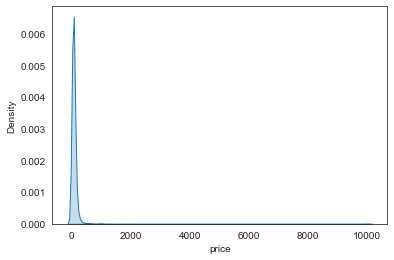

In [112]:
# let's plot the price data
sns.kdeplot(data=vienna['price'], shade='fill')
plt.show()

In [113]:
# check min price
vienna['price'].min()

0.0

In [114]:
# remove instances with $0 price
vienna = vienna.drop(vienna[vienna['price'] == 0].index)

vienna['price'].min()

9.0

In [115]:
# example to explain previous index code 
vienna[vienna['price'] == 9.0].index

Int64Index([23848728, 24443919, 37800761, 37801571, 38262713, 40673594,
            40845509, 40845756, 44230207, 45797045, 45798021, 45973934,
            46159502, 46757065, 46939763, 47710508, 47852675, 48063916,
            48650922],
           dtype='int64', name='id')

In [116]:
# check max price
vienna['price'].max()

10020.0

In [117]:
# 99% of data fall below the following price
top = int(vienna['price'].quantile(0.99))
top

459

In [118]:
# remove top 1% outliers
vienna = vienna.drop(vienna[vienna['price'] > top].index)

vienna['price'].max()

458.0

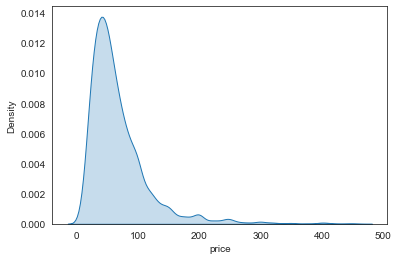

In [119]:
# check new kde plot with outliers removed
sns.kdeplot(data=vienna['price'], shade='fill')
plt.show()

### Dummy Variables<a name="dummy"></a>

Convert categorical variables into dummy variables as a lot of machine learning algorithms work specifically with numerical data.

In [120]:
# create a simple series
ser = pd.Series(['dog','cat','dog','horse'])
ser

0      dog
1      cat
2      dog
3    horse
dtype: object

In [121]:
pd.get_dummies(ser)

,cat,dog,horse
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,1


In [122]:
pd.get_dummies(ser, prefix='animal')

,animal_cat,animal_dog,animal_horse
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,1


In [123]:
# reduces correlation and dimensionality of data
pd.get_dummies(ser, drop_first=True)

,dog,horse
0,1,0
1,0,0
2,1,0
3,0,1


In [124]:
ser1 = ['cat','dog',np.nan]
ser1

['cat', 'dog', nan]

In [125]:
pd.get_dummies(ser1)

,cat,dog
0,1,0
1,0,1
2,0,0


In [126]:
pd.get_dummies(ser1, dummy_na=True)

,cat,dog,NaN
0,1,0,0
1,0,1,0
2,0,0,1


#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

**Exercise:** What are the values and counts for the following three columns: `host_is_superhost`, `room_type`, and `property_type`?

In [127]:
print(vienna['host_is_superhost'].value_counts())
print('---------')
print(vienna['room_type'].value_counts())
print('---------')
print(vienna['property_type'].value_counts())
print('---------')

f    8397
t    2865
Name: host_is_superhost, dtype: int64
---------
Entire home/apt    8316
Private room       2789
Shared room          86
Hotel room           71
Name: room_type, dtype: int64
---------
Apartment    8114
Room         2956
House         154
Other          38
Name: property_type, dtype: int64
---------


**Exercise:** Use `get_dummies()` with the `room_type` and `property_type`columns. Add a prefix of your choosing and drop the first dummy variable for each. *Note: I didn't show you how to work with columns within a DataFrame. See if you can look at the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to figure this out so that you update the `vienna` DataFrame.*

In [128]:
vienna=pd.get_dummies(vienna,columns=['room_type','property_type'],prefix=['room','property'],drop_first=True)
vienna.head()

,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighborhood_cleansed,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,room_Hotel room,room_Private room,room_Shared room,property_House,property_Other,property_Room
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15883,b&b near Old Danube river,"Four rooms, each one differently and individua...",62142.0,12/11/2009,unknown,NaN,100,f,6.0,Donaustadt,48.24262,16.42767,3.0,1 bath,1.0,2.0,"[""Hot water"", ""High chair"", ""Essentials"", ""Hai...",87.0,11.0,4/10/2015,2/19/2020,95.0,10.0,10.0,10.0,10.0,9.0,9.0,4.0,0.15,1,0,0,0,0,1
38768,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,166283.0,7/14/2010,within an hour,100,90-99,t,3.0,Leopoldstadt,48.21924,16.37831,5.0,1 bath,1.0,3.0,"[""Cooking basics"", ""Shampoo"", ""Kitchen"", ""Host...",60.0,324.0,3/23/2011,10/10/2020,95.0,10.0,9.0,10.0,10.0,10.0,10.0,3.0,2.64,0,0,0,0,0,0
40625,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,175131.0,7/20/2010,within a few hours,90-99,50-79,t,16.0,Rudolfsheim-Funfhaus,48.18434,16.32701,6.0,1 bath,2.0,4.0,"[""Cooking basics"", ""Children\u2019s books and ...",88.0,156.0,8/4/2010,2/15/2021,97.0,10.0,10.0,10.0,10.0,9.0,9.0,15.0,1.20,0,0,0,0,0,0
51287,little studio- next to citycenter- wifi- nice ...,small studio in new renovated old house and ve...,166283.0,7/14/2010,within an hour,100,90-99,t,3.0,Leopoldstadt,48.21778,16.37847,3.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Shampoo"", ""Kitchen"", ""Host...",60.0,310.0,1/27/2011,1/4/2021,92.0,10.0,9.0,10.0,10.0,10.0,9.0,3.0,2.49,0,0,0,0,0,0
70637,Flat in the Center with Terrace,<b>The space</b><br />My apartment (including ...,358842.0,1/23/2011,within a few hours,100,50-79,t,3.0,Leopoldstadt,48.21760,16.38018,2.0,2 shared baths,1.0,2.0,"[""Cooking basics"", ""Indoor fireplace"", ""Shampo...",50.0,116.0,3/28/2011,12/23/2019,95.0,10.0,9.0,10.0,9.0,10.0,10.0,3.0,0.95,0,1,0,0,0,1


**Exercise:** To make sure you understand what `get_dummies()` is doing, can you take the `host_is_superhost` column and turn the values into dummy variables without using `get_dummies()`? Make sure that you only have one column called `superhost` after you are finished and the original column is deleted.

In [129]:
super_map={'f':0,'t':1}
vienna['superhost']=vienna['host_is_superhost'].map(super_map)
vienna.drop('host_is_superhost',axis=1,inplace=True)
vienna.head()

,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,neighborhood_cleansed,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,room_Hotel room,room_Private room,room_Shared room,property_House,property_Other,property_Room,superhost
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15883,b&b near Old Danube river,"Four rooms, each one differently and individua...",62142.0,12/11/2009,unknown,NaN,100,6.0,Donaustadt,48.24262,16.42767,3.0,1 bath,1.0,2.0,"[""Hot water"", ""High chair"", ""Essentials"", ""Hai...",87.0,11.0,4/10/2015,2/19/2020,95.0,10.0,10.0,10.0,10.0,9.0,9.0,4.0,0.15,1,0,0,0,0,1,0
38768,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,166283.0,7/14/2010,within an hour,100,90-99,3.0,Leopoldstadt,48.21924,16.37831,5.0,1 bath,1.0,3.0,"[""Cooking basics"", ""Shampoo"", ""Kitchen"", ""Host...",60.0,324.0,3/23/2011,10/10/2020,95.0,10.0,9.0,10.0,10.0,10.0,10.0,3.0,2.64,0,0,0,0,0,0,1
40625,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,175131.0,7/20/2010,within a few hours,90-99,50-79,16.0,Rudolfsheim-Funfhaus,48.18434,16.32701,6.0,1 bath,2.0,4.0,"[""Cooking basics"", ""Children\u2019s books and ...",88.0,156.0,8/4/2010,2/15/2021,97.0,10.0,10.0,10.0,10.0,9.0,9.0,15.0,1.20,0,0,0,0,0,0,1
51287,little studio- next to citycenter- wifi- nice ...,small studio in new renovated old house and ve...,166283.0,7/14/2010,within an hour,100,90-99,3.0,Leopoldstadt,48.21778,16.37847,3.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Shampoo"", ""Kitchen"", ""Host...",60.0,310.0,1/27/2011,1/4/2021,92.0,10.0,9.0,10.0,10.0,10.0,9.0,3.0,2.49,0,0,0,0,0,0,1
70637,Flat in the Center with Terrace,<b>The space</b><br />My apartment (including ...,358842.0,1/23/2011,within a few hours,100,50-79,3.0,Leopoldstadt,48.21760,16.38018,2.0,2 shared baths,1.0,2.0,"[""Cooking basics"", ""Indoor fireplace"", ""Shampo...",50.0,116.0,3/28/2011,12/23/2019,95.0,10.0,9.0,10.0,9.0,10.0,10.0,3.0,0.95,0,1,0,0,0,1,1


## String Manipulation<a name="string"></a>

### String Object Methods<a name="string_object"></a>

One of Pythons most popular strengths is its ability to work with strings and text. Some of the more simple operations can easily be done with the built in string methods.

In [130]:
# create simple string of text
a = 'Jimmy,Anderson,  jimmy@gmail.com'
a

'Jimmy,Anderson,  jimmy@gmail.com'

In [131]:
# using the split() method
a.split(',') # splits text on the comma

['Jimmy', 'Anderson', '  jimmy@gmail.com']

In [132]:
# strip() removes whitespace from around character
b = [x.strip() for x in a.split(',')]
b

['Jimmy', 'Anderson', 'jimmy@gmail.com']

In [133]:
# joining strings within a list
'++'.join(b)

'Jimmy++Anderson++jimmy@gmail.com'

In [134]:
# count of number of commas
a.count(',')

2

In [135]:
# replace strings in text
a.replace(',','')

'JimmyAnderson  jimmy@gmail.com'

There are many more [string methods](https://www.w3schools.com/python/python_ref_string.asp) that you can research, and you will learn more about some of these in the 575 Python class if you haven't already taken it.

Now, let's try to clean up the 'messy' `amenities` column from the `vienna` data. 

In [136]:
# view the amenities for one property
vienna.iloc[0]['amenities']

'["Hot water", "High chair", "Essentials", "Hair dryer", "TV", "Long term stays allowed", "Shampoo", "Pack \\u2019n Play/travel crib", "Hangers", "Breakfast", "Luggage dropoff allowed", "Smoke alarm", "Dedicated workspace", "Wifi", "Patio or balcony", "Heating", "Free street parking", "Bed linens", "Air conditioning"]'

In [137]:
# create an empty list
all_amenities = []

# iterate through rows, extending amenities to list
for row in vienna.amenities:
    all_amenities.extend(row.replace('[','').replace(']','').replace('"','').lower().strip().split(','))

In [138]:
all_amenities

['hot water',
 ' high chair',
 ' essentials',
 ' hair dryer',
 ' tv',
 ' long term stays allowed',
 ' shampoo',
 ' pack \\u2019n play/travel crib',
 ' hangers',
 ' breakfast',
 ' luggage dropoff allowed',
 ' smoke alarm',
 ' dedicated workspace',
 ' wifi',
 ' patio or balcony',
 ' heating',
 ' free street parking',
 ' bed linens',
 ' air conditioning',
 'cooking basics',
 ' shampoo',
 ' kitchen',
 ' host greets you',
 ' smoke alarm',
 ' dedicated workspace',
 ' coffee maker',
 ' oven',
 ' hair dryer',
 ' stove',
 ' patio or balcony',
 ' refrigerator',
 ' carbon monoxide alarm',
 ' hangers',
 ' microwave',
 ' dishes and silverware',
 ' iron',
 ' bed linens',
 ' hot water',
 ' essentials',
 ' long term stays allowed',
 ' wifi',
 ' washer',
 ' heating',
 'cooking basics',
 ' children\\u2019s books and toys',
 ' shampoo',
 ' kitchen',
 ' luggage dropoff allowed',
 ' smoke alarm',
 ' dedicated workspace',
 ' babysitter recommendations',
 ' coffee maker',
 ' high chair',
 ' first aid kit',
 

In [139]:
amenities_list = pd.unique(all_amenities)
amenities_list

array(['hot water', ' high chair', ' essentials', ' hair dryer', ' tv',
       ' long term stays allowed', ' shampoo',
       ' pack \\u2019n play/travel crib', ' hangers', ' breakfast',
       ' luggage dropoff allowed', ' smoke alarm', ' dedicated workspace',
       ' wifi', ' patio or balcony', ' heating', ' free street parking',
       ' bed linens', ' air conditioning', 'cooking basics', ' kitchen',
       ' host greets you', ' coffee maker', ' oven', ' stove',
       ' refrigerator', ' carbon monoxide alarm', ' microwave',
       ' dishes and silverware', ' iron', ' hot water', ' washer',
       ' children\\u2019s books and toys', ' babysitter recommendations',
       ' first aid kit', ' central air conditioning', ' conditioner',
       ' shower gel', ' extra pillows and blankets', ' wine glasses',
       ' fire extinguisher', ' barbecue utensils',
       ' paid parking garage off premises \\u2013 eur5 per day',
       ' dishwasher', ' elevator', ' body soap',
       ' stainless 

In [140]:
### Note: You are not responsible for knowing how to do this part of the code. This is to show you what can be done. ###
amenity_values = vienna['amenities']
amenity_values

id
15883       ["Hot water", "High chair", "Essentials", "Hai...
38768       ["Cooking basics", "Shampoo", "Kitchen", "Host...
40625       ["Cooking basics", "Children\u2019s books and ...
51287       ["Cooking basics", "Shampoo", "Kitchen", "Host...
70637       ["Cooking basics", "Indoor fireplace", "Shampo...
                                  ...                        
49169158    ["Shampoo", "Kitchen", "Smoke alarm", "Paid pa...
49169449    ["Cooking basics", "Essentials", "Hair dryer",...
49169526    ["Shampoo", "Dedicated workspace", "Lock on be...
49170145    ["Kitchen", "Dedicated workspace", "Record pla...
49171797    ["Indoor fireplace", "Shampoo", "Kitchen", "Lo...
Name: amenities, Length: 11262, dtype: object

In [141]:
# check the following for more information: https://docs.python.org/3/library/collections.html#collections.Counter
from collections import Counter

# create Series of amenities column
amenity_values = vienna['amenities']

# instantiate counter object
counter = Counter()

# update counter with each amenity and its total
for response in amenity_values:
    counter.update(response.replace('[','').replace(']','').replace('"','').lower().split(','))

# create two empty lists    
amenities_list = []
amenities_count = []

# iterate through most common amenities in counter and append to lists
for item in counter.most_common(50):
    amenities_list.append(item[0])
    amenities_count.append(item[1])
    
most_common_amenities = zip(amenities_list,amenities_count)
print(list(most_common_amenities))

[(' heating', 10784), (' wifi', 10748), (' kitchen', 10456), (' long term stays allowed', 9507), (' hair dryer', 9209), (' washer', 9029), (' hangers', 8992), (' essentials', 8669), (' dedicated workspace', 8311), (' iron', 7951), (' shampoo', 6540), (' dishes and silverware', 6170), (' refrigerator', 5993), (' stove', 5345), (' hot water', 5281), (' coffee maker', 5142), (' elevator', 5105), (' bed linens', 4918), ('cooking basics', 4515), (' oven', 4468), (' tv', 4386), (' smoke alarm', 4385), (' dishwasher', 4178), (' microwave', 3801), (' private entrance', 3101), (' fire extinguisher', 3088), (' cable tv', 2963), (' paid parking off premises', 2723), (' first aid kit', 2641), (' carbon monoxide alarm', 2623), (' host greets you', 2531), (' dryer', 2460), (' extra pillows and blankets', 2348), (' tv with standard cable', 2214), (' luggage dropoff allowed', 2171), (' lockbox', 1937), ('hot water', 1866), ('essentials', 1840), (' patio or balcony', 1631), (' air conditioning', 1621),

In [142]:
def amenities_to_columns(data):
    '''
    Creates new amenity features if the list of amenities for a respective property includes
    certain key words.
    
    Returns: DataFrame
    '''
    # create list of new amenity columns
    new_columns = ['tv','longterm','washing','cooking','fridge','fireplace','free_parking','paid_parking',
                   'air_conditioning','balcony','water_access','coffee','breakfast','family','workspace']
    
    #search 'amenities' feature for keywords, create new column and dummy variable if true
    data.loc[data['amenities'].str.contains('tv|cable|amazon prime|netflix', case=False), 'tv'] = 1
    data.loc[data['amenities'].str.contains('long term', case=False), 'longterm'] = 1
    data.loc[data['amenities'].str.contains('washer|dishwasher', case=False), 'washing'] = 1
    data.loc[data['amenities'].str.contains('stove|oven|microwave', case=False), 'cooking'] = 1
    data.loc[data['amenities'].str.contains('refrigerator|freezer|fridge', case=False), 'fridge'] = 1
    data.loc[data['amenities'].str.contains('fireplace|fire pit', case=False), 'fireplace'] = 1
    data.loc[data['amenities'].str.contains('free parking|free street parking', case=False), 'free_parking'] = 1
    data.loc[data['amenities'].str.contains('paid parking|paid street parking',case=False), 'paid_parking'] = 1
    data.loc[data['amenities'].str.contains('air conditioning|central air conditioning', case=False), 'air_conditioning'] = 1
    data.loc[data['amenities'].str.contains('balcony|patio', case=False), 'balcony'] = 1
    data.loc[data['amenities'].str.contains('hot tub|waterfront|pool|lake|beachfront', case=False), 'water_access'] = 1
    data.loc[data['amenities'].str.contains('coffee|coffee machine|nespresso', case=False), 'coffee'] = 1
    data.loc[data['amenities'].str.contains('breakfast', case=False), 'breakfast'] = 1
    data.loc[data['amenities'].str.contains('high chair|crib|children|child|baby|family', case=False), 'family'] = 1
    data.loc[data['amenities'].str.contains('workspace', case=False), 'workspace'] = 1

    # replace na's with 0
    data[new_columns] = data[new_columns].fillna(0)
    
    return data
    
vienna = amenities_to_columns(vienna)

In [143]:
vienna = vienna.drop('amenities', axis=1)
vienna.head()

,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,neighborhood_cleansed,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,room_Hotel room,room_Private room,room_Shared room,property_House,property_Other,property_Room,superhost,tv,longterm,washing,cooking,fridge,fireplace,free_parking,paid_parking,air_conditioning,balcony,water_access,coffee,breakfast,family,workspace
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15883,b&b near Old Danube river,"Four rooms, each one differently and individua...",62142.0,12/11/2009,unknown,NaN,100,6.0,Donaustadt,48.24262,16.42767,3.0,1 bath,1.0,2.0,87.0,11.0,4/10/2015,2/19/2020,95.0,10.0,10.0,10.0,10.0,9.0,9.0,4.0,0.15,1,0,0,0,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
38768,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,166283.0,7/14/2010,within an hour,100,90-99,3.0,Leopoldstadt,48.21924,16.37831,5.0,1 bath,1.0,3.0,60.0,324.0,3/23/2011,10/10/2020,95.0,10.0,9.0,10.0,10.0,10.0,10.0,3.0,2.64,0,0,0,0,0,0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
40625,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,175131.0,7/20/2010,within a few hours,90-99,50-79,16.0,Rudolfsheim-Funfhaus,48.18434,16.32701,6.0,1 bath,2.0,4.0,88.0,156.0,8/4/2010,2/15/2021,97.0,10.0,10.0,10.0,10.0,9.0,9.0,15.0,1.20,0,0,0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
51287,little studio- next to citycenter- wifi- nice ...,small studio in new renovated old house and ve...,166283.0,7/14/2010,within an hour,100,90-99,3.0,Leopoldstadt,48.21778,16.37847,3.0,1 bath,1.0,2.0,60.0,310.0,1/27/2011,1/4/2021,92.0,10.0,9.0,10.0,10.0,10.0,9.0,3.0,2.49,0,0,0,0,0,0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
70637,Flat in the Center with Terrace,<b>The space</b><br />My apartment (including ...,358842.0,1/23/2011,within a few hours,100,50-79,3.0,Leopoldstadt,48.21760,16.38018,2.0,2 shared baths,1.0,2.0,50.0,116.0,3/28/2011,12/23/2019,95.0,10.0,9.0,10.0,9.0,10.0,10.0,3.0,0.95,0,1,0,0,0,1,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### Regular Expressions<a name="regex"></a>

While string methods are powerful and can be used in a lot of different ways, sometimes you need a way to search a more complex string pattern. This is where regular expressions (`regex`) offer a flexible way to search or match complex patterns.

Regex could be an entire module on its own, but we will cover some of the basics now.

https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf

In [144]:
# import the re module
import re

In [145]:
# create a simple text message
text = 'A     Lannister\tnever\nforgets'

# split strings based on whitespace characters (tabs, spaces, newlines)
re.split('\s+', text)

['A', 'Lannister', 'never', 'forgets']

When you call `re.split()` it is first compiled, then the split method is called on the passed text. You can compile the regex yourself, which is highly recommended if you apply the same expression to many strings. This will also save you CPU cycles. 

In [146]:
# setup text of names and emails
emails = """
James james.anderson@eastern.edu
Sally sally@gmail.com
Ryan ryan22@yahoo.com
"""

# creating pattern using raw string literal
pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b' 

# compile the regex
regex = re.compile(pattern, flags=re.IGNORECASE)

In [147]:
# returns all matches in a string
regex.findall(emails)

['james.anderson@eastern.edu', 'sally@gmail.com', 'ryan22@yahoo.com']

In [148]:
# returns only the first match
position = regex.search(emails) # first email, start and end position
position

<re.Match object; span=(7, 33), match='james.anderson@eastern.edu'>

In [149]:
emails[position.start():position.end()]

'james.anderson@eastern.edu'

In [150]:
# only matches the beginning of the string
print(regex.match(emails)) #only match if pattern occurs at the start of the string

None


In [151]:
# simple program to validate an email

#create email list
email_list = ['james.anderson@eastern.edu','sally@gmail.com','ryan22@yahoo']

# iterate through emails
for email in email_list:
    if (re.fullmatch(regex, email)):
        print("Valid Email")
 
    else:
        print("Invalid Email")
        

Valid Email
Valid Email
Invalid Email


In [152]:
# returns new string with occurrences of the pattern replaced by the new string
print(regex.sub('REDACTED', emails))


James REDACTED
Sally REDACTED
Ryan REDACTED



In [153]:
# wrap parentheses around different segments
pattern2 = r'(\b[A-Za-z0-9._%+-]+)@([A-Za-z0-9.-]+)\.([A-Z|a-z]{2,}\b)'

# compile with new pattern
regex = re.compile(pattern2, flags=re.IGNORECASE)

# returns tuple of matched components
segments = regex.match('jamie.andrews@eastern.edu')
segments

segments.groups()

('jamie.andrews', 'eastern', 'edu')

Let's look at a practical example using our `vienna` dataset. We need to turn the strings as listed in the `bathrooms_text` column to floats.

In [154]:
# view column
vienna['bathrooms_text'].value_counts()

1 bath               6707
1.5 baths            1840
1 shared bath        1332
1.5 shared baths      379
2 baths               305
1 private bath        246
2.5 baths             120
2 shared baths         94
Half-bath              51
2.5 shared baths       38
3 baths                32
3 shared baths         20
Shared half-bath       17
3.5 baths              16
0 baths                15
4 baths                10
3.5 shared baths        9
1                       7
4.5 baths               6
4 shared baths          5
Private half-bath       4
0 shared baths          3
6 baths                 2
5 baths                 2
11 baths                1
8 baths                 1
Name: bathrooms_text, dtype: int64

In [155]:
pattern = r"[-+]?\d*\.\d+|\d+"
# [-+] --> handles plus or minus signs
# ? -->  matches the expression to its left 0 or 1 times.
# \d --> matches digits
# * --> matches the expression to its left 0 or more times.
# \. --> escapes the decimal character
# + --> y matches the expression to its left 1 or more times.
# | --> matches expression before or after 


def bathroomtext_to_num(text):
    '''
    Strips out number from bathrooms_text field 
    
    Returns: float
    '''
    pattern = r"[-+]?\d*\.\d+|\d+"  
    regex = re.compile(pattern)
    num_baths = regex.findall(str(text))
    
    if 'half' in str(text).lower():
        return 0.5
    elif num_baths == []:
        return 1
    else:
        return num_baths[0]

# apply custom function to 'bathrooms_text' column
vienna['bathrooms'] = vienna.apply(lambda row: bathroomtext_to_num(row['bathrooms_text']), axis=1).astype('float64')


In [156]:
# view new 'bathrooms' feature
vienna[['bathrooms','bathrooms_text']].head(10)

,bathrooms,bathrooms_text
id,,
15883,1.0,1 bath
38768,1.0,1 bath
40625,1.0,1 bath
51287,1.0,1 bath
70637,2.0,2 shared baths
75471,1.0,1 bath
75500,1.0,1 bath
90247,1.0,1 bath
98210,0.5,Shared half-bath


In [157]:
vienna = vienna.drop('bathrooms_text', axis=1)

In [158]:
vienna.head()  

,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,neighborhood_cleansed,latitude,longitude,accommodates,bedrooms,beds,price,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,room_Hotel room,room_Private room,room_Shared room,property_House,property_Other,property_Room,superhost,tv,longterm,washing,cooking,fridge,fireplace,free_parking,paid_parking,air_conditioning,balcony,water_access,coffee,breakfast,family,workspace,bathrooms
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15883,b&b near Old Danube river,"Four rooms, each one differently and individua...",62142.0,12/11/2009,unknown,NaN,100,6.0,Donaustadt,48.24262,16.42767,3.0,1.0,2.0,87.0,11.0,4/10/2015,2/19/2020,95.0,10.0,10.0,10.0,10.0,9.0,9.0,4.0,0.15,1,0,0,0,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
38768,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,166283.0,7/14/2010,within an hour,100,90-99,3.0,Leopoldstadt,48.21924,16.37831,5.0,1.0,3.0,60.0,324.0,3/23/2011,10/10/2020,95.0,10.0,9.0,10.0,10.0,10.0,10.0,3.0,2.64,0,0,0,0,0,0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
40625,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,175131.0,7/20/2010,within a few hours,90-99,50-79,16.0,Rudolfsheim-Funfhaus,48.18434,16.32701,6.0,2.0,4.0,88.0,156.0,8/4/2010,2/15/2021,97.0,10.0,10.0,10.0,10.0,9.0,9.0,15.0,1.20,0,0,0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
51287,little studio- next to citycenter- wifi- nice ...,small studio in new renovated old house and ve...,166283.0,7/14/2010,within an hour,100,90-99,3.0,Leopoldstadt,48.21778,16.37847,3.0,1.0,2.0,60.0,310.0,1/27/2011,1/4/2021,92.0,10.0,9.0,10.0,10.0,10.0,9.0,3.0,2.49,0,0,0,0,0,0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
70637,Flat in the Center with Terrace,<b>The space</b><br />My apartment (including ...,358842.0,1/23/2011,within a few hours,100,50-79,3.0,Leopoldstadt,48.21760,16.38018,2.0,1.0,2.0,50.0,116.0,3/28/2011,12/23/2019,95.0,10.0,9.0,10.0,9.0,10.0,10.0,3.0,0.95,0,1,0,0,0,1,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0


## Extra Practice: Plotting and Miscellaneous<a name='extra'></a>

**Exercise:** Plot a [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) of longitude and latitude using the 'free_parking' attribute as the color. What do you notice about properties with free parking?

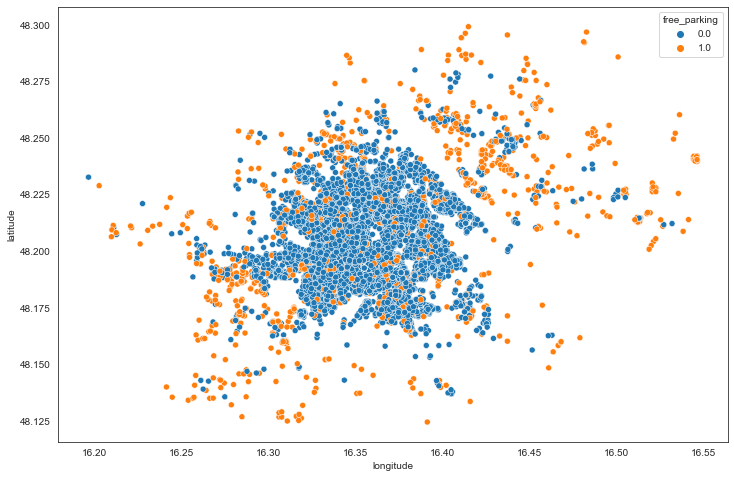

In [159]:
plt.figure(figsize=(12,8))
g=sns.scatterplot(x='longitude',y='latitude',data=vienna,hue='free_parking')
plt.show()

**Exercise:** Plot a scatterplot of longitude and latitude using price as the color. Do you notice any discerable pattern in terms of price versus the area of Vienna?

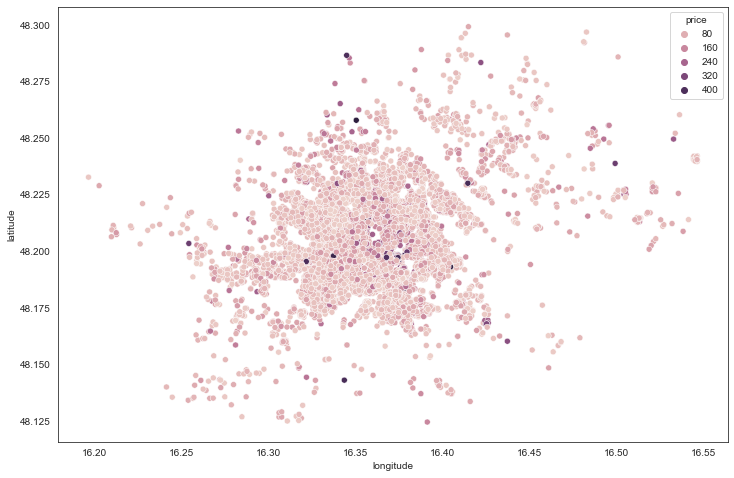

In [160]:
plt.figure(figsize=(12,8))
g=sns.scatterplot(x='longitude',y='latitude',data=vienna,hue='price')
plt.show()

**Exercise:** Plot a [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) using the price and the neighborhood name. What neighborhoods seem to have the largest range and highest median prices?

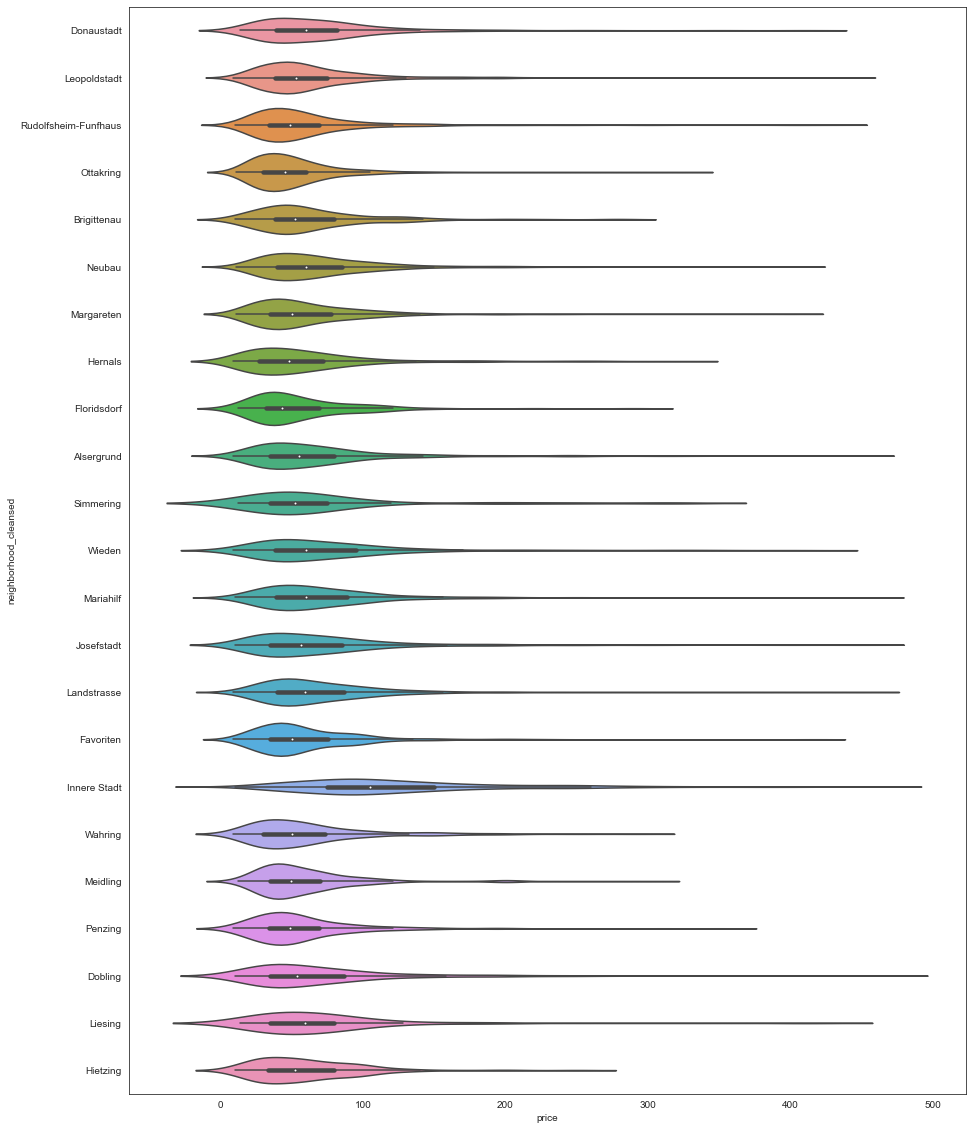

In [161]:
plt.figure(figsize=(15,20))
g=sns.violinplot(x='price',y='neighborhood_cleansed',data=vienna)
plt.show()

**Exercise:** What areas have the most listings? Create a [horizontal bar chart](https://seaborn.pydata.org/generated/seaborn.countplot.html) to show these listings by neighborhood.

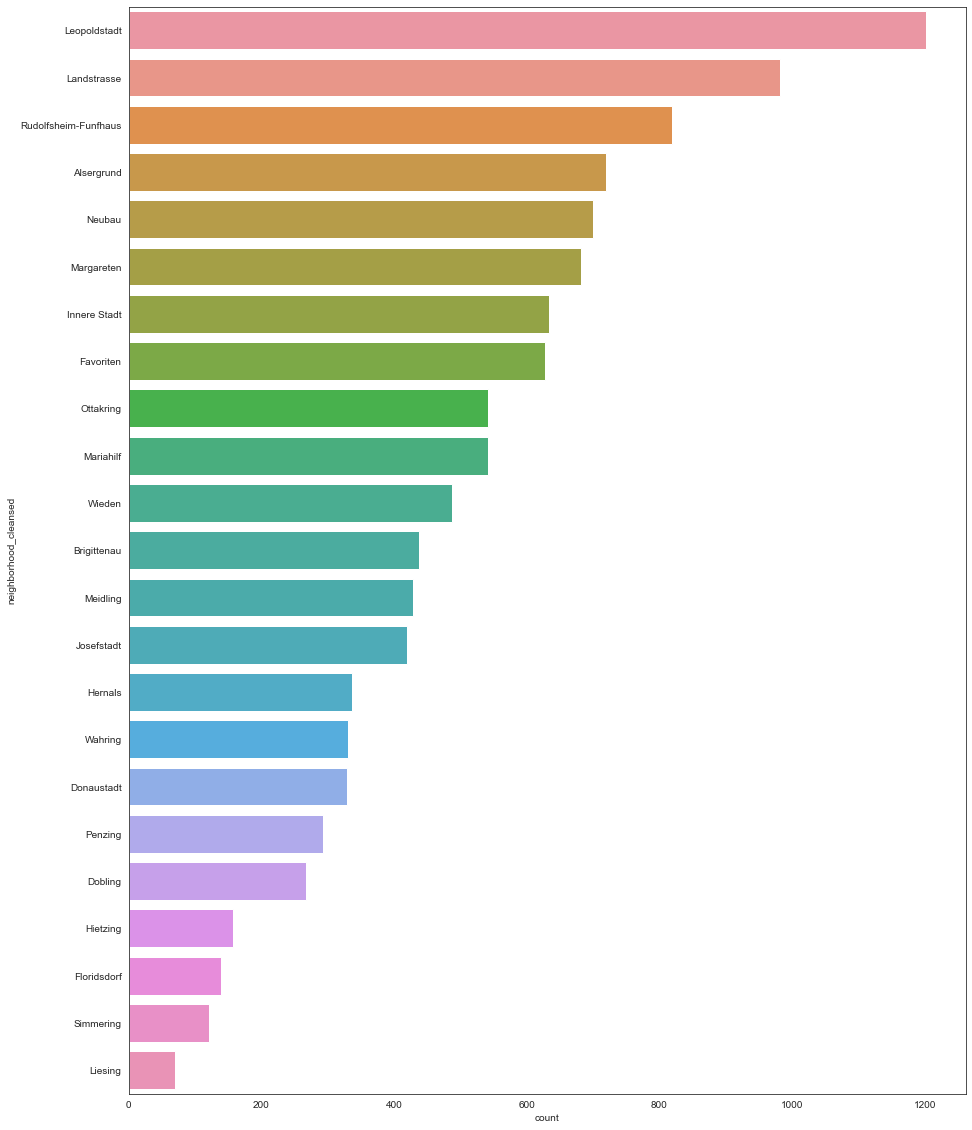

In [162]:
plt.figure(figsize=(15,20))
sns.countplot(y='neighborhood_cleansed',data=vienna,order=vienna['neighborhood_cleansed'].value_counts().index,orient='h')
plt.show()

**Exercise:** Using a pivot table, show the top hosts (represented by `host_id`) that have the most multiple listings (`calculated_host_listings_count`).

In [163]:
vienna.pivot_table('calculated_host_listings_count', index='host_id').sort_values(by='calculated_host_listings_count',ascending=False).head(10)

,calculated_host_listings_count
host_id,
15935294.0,83.0
2816192.0,74.0
4331202.0,73.0
8632750.0,72.0
757295.0,55.0
88128342.0,52.0
384050980.0,51.0
195648200.0,50.0
1108400.0,48.0


**Exercise:** How many beds, bedrooms, and bathrooms do most properties have? What percentage of properties have those respective most common values?

In [165]:
vienna['beds'].value_counts().nlargest(5)
vienna['beds'].value_counts(normalize=True)

1.0     0.466081
2.0     0.315663
3.0     0.102646
4.0     0.050346
0.0     0.025129
5.0     0.018114
6.0     0.011543
7.0     0.003463
8.0     0.003197
10.0    0.001421
9.0     0.000533
15.0    0.000355
16.0    0.000355
12.0    0.000355
11.0    0.000178
13.0    0.000178
18.0    0.000089
17.0    0.000089
20.0    0.000089
19.0    0.000089
14.0    0.000089
Name: beds, dtype: float64

In [167]:
vienna['bedrooms'].value_counts().nlargest(5)
vienna['bedrooms'].value_counts(normalize=True)

1.0     0.775706
2.0     0.171550
3.0     0.041200
4.0     0.008258
5.0     0.001510
6.0     0.000622
10.0    0.000266
7.0     0.000266
14.0    0.000266
8.0     0.000178
18.0    0.000089
9.0     0.000089
Name: bedrooms, dtype: float64

In [168]:
vienna['bathrooms'].value_counts().nlargest(5)
vienna['bathrooms'].value_counts(normalize=True)

1.0     0.736281
1.5     0.197034
2.0     0.035429
2.5     0.014029
0.5     0.006393
3.0     0.004617
3.5     0.002220
0.0     0.001598
4.0     0.001332
4.5     0.000533
6.0     0.000178
5.0     0.000178
11.0    0.000089
8.0     0.000089
Name: bathrooms, dtype: float64

**Exercise:** Similar to how we binned the `host_response_time`, `host_response_rate`, and `host_acceptance_rate`, perform a similar binning for the various review scores attributes.
    
- `review_scores_rating`: bin the review scores between '0-79', '80-94','95-99' and '100'.
- other review ratings: bin these scores between '0-8','9', and '10'
- add an unknown category and fill the na's with 'unkown' (don't forget to reorder your categories so that 'unknown' is first)

In [170]:
review_cols=['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
vienna.loc[:,'review_scores_rating']=pd.cut(x=vienna['review_scores_rating'], bins=[0,79,94,99,100],labels=['0-79','80-94','95-99','100'])
vienna['review_scores_rating']=vienna['review_scores_rating'].cat.add_categories('unknown').cat.reorder_categories(['unknown','0-79','80-94','95-99','100'])
vienna.loc[:,'review_scores_rating']=vienna.loc[:,'review_scores_rating'].fillna('unknown')

for col in review_cols:
    vienna.loc[:,col]=pd.cut(x=vienna[col],bins=[0,8,9,10],labels=['0-8','9','10'])
    vienna[col]=vienna[col].cat.add_categories('unknown').cat.reorder_categories(['unknown','0-8','9','10'])
    vienna.loc[:,col]=vienna.loc[:,col].fillna('unknown')

In [171]:
vienna.head(10)

,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,neighborhood_cleansed,latitude,longitude,accommodates,bedrooms,beds,price,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,room_Hotel room,room_Private room,room_Shared room,property_House,property_Other,property_Room,superhost,tv,longterm,washing,cooking,fridge,fireplace,free_parking,paid_parking,air_conditioning,balcony,water_access,coffee,breakfast,family,workspace,bathrooms
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15883,b&b near Old Danube river,"Four rooms, each one differently and individua...",62142.0,12/11/2009,unknown,NaN,100,6.0,Donaustadt,48.24262,16.42767,3.0,1.0,2.0,87.0,11.0,4/10/2015,2/19/2020,95-99,10,10,10,10,9,9,4.0,0.15,1,0,0,0,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
38768,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,166283.0,7/14/2010,within an hour,100,90-99,3.0,Leopoldstadt,48.21924,16.37831,5.0,1.0,3.0,60.0,324.0,3/23/2011,10/10/2020,95-99,10,9,10,10,10,10,3.0,2.64,0,0,0,0,0,0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
40625,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,175131.0,7/20/2010,within a few hours,90-99,50-79,16.0,Rudolfsheim-Funfhaus,48.18434,16.32701,6.0,2.0,4.0,88.0,156.0,8/4/2010,2/15/2021,95-99,10,10,10,10,9,9,15.0,1.20,0,0,0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
51287,little studio- next to citycenter- wifi- nice ...,small studio in new renovated old house and ve...,166283.0,7/14/2010,within an hour,100,90-99,3.0,Leopoldstadt,48.21778,16.37847,3.0,1.0,2.0,60.0,310.0,1/27/2011,1/4/2021,80-94,10,9,10,10,10,9,3.0,2.49,0,0,0,0,0,0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
70637,Flat in the Center with Terrace,<b>The space</b><br />My apartment (including ...,358842.0,1/23/2011,within a few hours,100,50-79,3.0,Leopoldstadt,48.21760,16.38018,2.0,1.0,2.0,50.0,116.0,3/28/2011,12/23/2019,95-99,10,9,10,9,10,10,3.0,0.95,0,1,0,0,0,1,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0
75471,nice big apartment with balcony,you will like my beautiful apartment with balc...,363315.0,1/26/2011,unknown,NaN,NaN,1.0,Ottakring,48.22207,16.31594,4.0,2.0,2.0,77.0,50.0,8/17/2011,1/2/2019,95-99,10,9,10,10,9,9,1.0,0.43,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
75500,Lovely Viennese apartment (2-4 p.),YOU WILL FEEL AT HOME FROM THE VERY FIRST MOME...,400857.0,2/20/2011,within a day,100,100,1.0,Brigittenau,48.23493,16.36752,4.0,2.0,2.0,65.0,14.0,7/20/2011,12/1/2019,80-94,9,9,9,9,0-8,9,1.0,0.12,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
90247,Beautiful New Central Apartment,"2-room apartment 55 m2 on 1st floor, fully ren...",489611.0,4/6/2011,within an hour,100,100,2.0,Neubau,48.20599,16.34890,4.0,1.0,2.0,98.0,631.0,4/21/2011,11/1/2020,95-99,10,10,10,10,10,10,3.0,5.18,0,0,0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
98210,CIty Center Room with Private Shower,LOCATION: <br />- At the heart of Vienna - All...,518644.0,4/18/2011,a few days or more,0-49,0-49,52.0,Margareten,48.19388,16.35859,2.0,1.0,1.0,35.0,92.0,5/8/2011,8/3/2020,80-94,9,10,10,10,10,9,41.0,0.76,0,1,0,0,0,1,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.5


## Conclusion<a name="conclusion"></a>

In reality, a lot more needs to be done to this dataset before it is ready for a machine learning algorithm to be run. Also, as I mentioned above, there are sometimes easier ways to perform some of these data manipulations using Scikit-learn, which you will learn about more in the machine learning classes.

After cleaning up the data further, checking for correlation between the attributes, dropping attributes and creating some new ones using this data, the best machine learning model was able to predict **66%** of the price using this data with a RMSE score of **0.3643** (the target value was changed to use the log of the price).

Given the above results, my conclusion is that this data can be used to predict prices somewhat but more work or more data is needed to create a better model. Future work could involve:

- performing analysis on the photos and determine if they have an impact on price
- performing a sentiment analysis on the foreign language comments (from a different file on the InsideAirbnb website) to determine if the guest comments could be an indicator of price. I was able to perform a sentiment analysis on the English language comments and there was not much impact on the model.
- further feature extraction/elimination
- prices are the listed prices from the Airbnb website. A more accurate model might be obtained by using the prices that guests actually paid for a property
- personally scrape data from the Aribnb website to obtain more information than what is listed in the file